In [31]:
import numpy as np
import pandas as pd

data = pd.read_csv("india-food-prices.csv")
data.head()
x=data["date"]
y=data["price"]
data.describe()


/var/folders/8y/g9dn_v3953j0q8tjpk2n5jgc0000gn/T/ipykernel_11606/3663292594.py:4: DtypeWarning: Columns (4,5,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("india-food-prices.csv")


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,pricetype,currency,price,usdprice
count,133138,132349,132349,133138,132349,132349,133138,133138,133138,133138,133138,133138,133138
unique,332,32,150,157,210,206,7,24,4,2,2,23995,2874
top,2021-06-15,Uttar Pradesh,Mumbai city,Mumbai,18.975,72.825833,cereals and tubers,Rice,KG,actual,INR,16.0,0.27
freq,2941,9661,4112,4112,2920,2920,33234,10573,123716,133137,133137,1393,1241


In [32]:
data.drop(['latitude','longitude','admin1','admin2','category','commodity','unit','usdprice','currency','pricetype'],axis=1,inplace=True)
#data.drop([],axis=1)


In [46]:
data.drop(['usdprice'],axis=1)

,date,market,commodity,price
0,#date,#loc+market+name,#item+name,#value
1,1994-01-15,Delhi,Rice,8.0
2,1994-01-15,Delhi,Wheat,5.0
3,1994-01-15,Delhi,Sugar,13.5
4,1994-01-15,Delhi,Oil (mustard),31.0
...,...,...,...,...
133133,2021-07-15,Kharagpur,Lentils (masur),104.37
133134,2021-07-15,Kharagpur,Lentils (moong),115.0
133135,2021-07-15,Kharagpur,Lentils (urad),105.0
133136,2021-07-15,Kharagpur,Onions,30.0


In [47]:
#drop rows
data=data.iloc[1:]

In [48]:
data.head()



,date,market,commodity,price,usdprice
1,1994-01-15,Delhi,Rice,8.0,0.25
2,1994-01-15,Delhi,Wheat,5.0,0.16
3,1994-01-15,Delhi,Sugar,13.5,0.43
4,1994-01-15,Delhi,Oil (mustard),31.0,0.99
5,1994-01-15,Ahmedabad,Rice,6.8,0.22


In [49]:
data.describe()

,date,market,commodity,price,usdprice
count,133137,133137,133137,133137,133137
unique,331,156,23,23994,2873
top,2021-06-15,Mumbai,Rice,16.0,0.27
freq,2941,4112,10573,1393,1241


In [50]:
data.isnull().sum()

date         0
market       0
commodity    0
price        0
usdprice     0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133137 entries, 1 to 133137
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       133137 non-null  object
 1   market     133137 non-null  object
 2   commodity  133137 non-null  object
 3   price      133137 non-null  object
 4   usdprice   133137 non-null  object
dtypes: object(5)
memory usage: 5.1+ MB


In [52]:
data

,date,market,commodity,price,usdprice
1,1994-01-15,Delhi,Rice,8.0,0.25
2,1994-01-15,Delhi,Wheat,5.0,0.16
3,1994-01-15,Delhi,Sugar,13.5,0.43
4,1994-01-15,Delhi,Oil (mustard),31.0,0.99
5,1994-01-15,Ahmedabad,Rice,6.8,0.22
...,...,...,...,...,...
133133,2021-07-15,Kharagpur,Lentils (masur),104.37,1.4
133134,2021-07-15,Kharagpur,Lentils (moong),115.0,1.54
133135,2021-07-15,Kharagpur,Lentils (urad),105.0,1.41
133136,2021-07-15,Kharagpur,Onions,30.0,0.4


In [83]:
df = pd.DataFrame()

df[['DD','MM','YYYY']] = data['date'].str.split('-',expand=True)
df['price']=data['price']
df['market']=data['market']

In [84]:
df.dtypes

DD        object
MM        object
YYYY      object
price     object
market    object
dtype: object

In [85]:
df.head()

,DD,MM,YYYY,price,market
1,1994,01,15,8.0,Delhi
2,1994,01,15,5.0,Delhi
3,1994,01,15,13.5,Delhi
4,1994,01,15,31.0,Delhi
5,1994,01,15,6.8,Ahmedabad


In [117]:
#int dd mm yyyy
df['price']= pd.to_numeric(df['price'])
df['MM']= pd.to_numeric(df['MM'])
df['YYYY']= pd.to_numeric(df['YYYY'])
df['DD']= pd.to_numeric(df['DD'])
df['market']= data['market'] 
df['commodity']= data['commodity'] 

In [118]:
df.dtypes

DD                    int64
MM                    int64
YYYY                  int64
price               float64
market               object
datetime     datetime64[ns]
year                  int64
month                 int64
day                   int64
commodity            object
dtype: object

In [119]:
#to datetime
df['datetime'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
df

,DD,MM,YYYY,price,market,datetime,year,month,day,commodity
1,1994,1,15,8.00,Delhi,1994-01-15,1994,1,15,Rice
2,1994,1,15,5.00,Delhi,1994-01-15,1994,1,15,Wheat
3,1994,1,15,13.50,Delhi,1994-01-15,1994,1,15,Sugar
4,1994,1,15,31.00,Delhi,1994-01-15,1994,1,15,Oil (mustard)
5,1994,1,15,6.80,Ahmedabad,1994-01-15,1994,1,15,Rice
...,...,...,...,...,...,...,...,...,...,...
133133,2021,7,15,104.37,Kharagpur,2021-07-15,2021,7,15,Lentils (masur)
133134,2021,7,15,115.00,Kharagpur,2021-07-15,2021,7,15,Lentils (moong)
133135,2021,7,15,105.00,Kharagpur,2021-07-15,2021,7,15,Lentils (urad)
133136,2021,7,15,30.00,Kharagpur,2021-07-15,2021,7,15,Onions


In [145]:
#dfsplit['ut']=dfsplit['DD']*10000000+dfsplit['MM']*100+dfsplit['YYYY']
df.dtypes
df.index = df.datetime

In [146]:
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df['day'] = df.datetime.dt.day

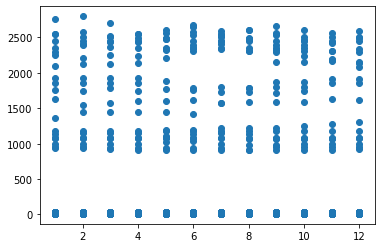

In [147]:
import matplotlib.pyplot as plt
x = df.month
y = df.price

plt.scatter(x,y)
plt.show()

<AxesSubplot:xlabel='month'>

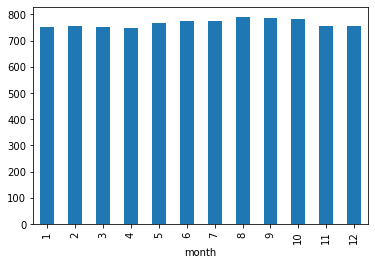

In [148]:
df.groupby('month').price.mean().plot.bar()

<AxesSubplot:xlabel='year'>

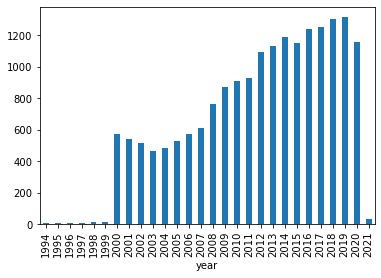

In [149]:
df.groupby('year').price.mean().plot.bar()

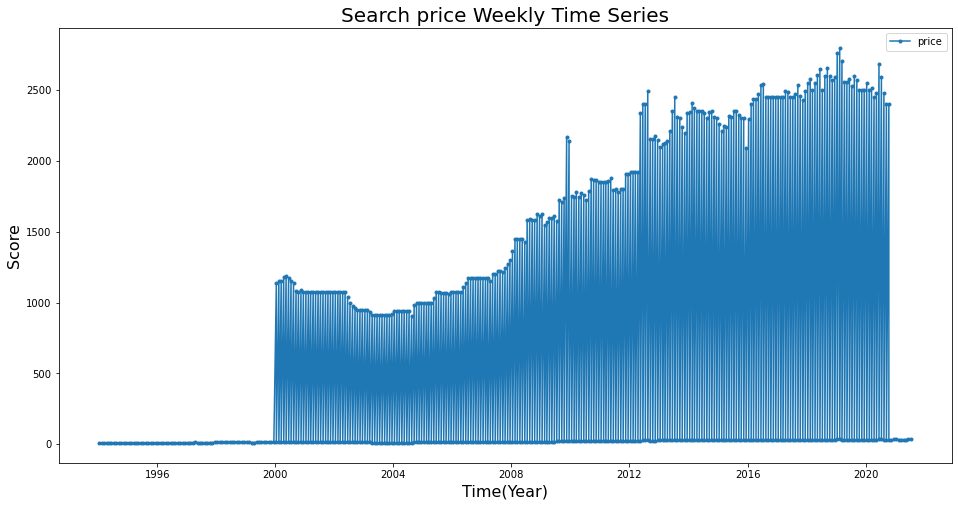

In [162]:
plt.figure(figsize=(16,8))

plt.plot(df['price'], ".-", label = 'price')

plt.title('Search price Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')


In [151]:
df.head()

,price,market,datetime,year,month,day,commodity
datetime,,,,,,,
1994-01-15,7.5,Mumbai,1994-01-15,1994,1,15,Rice
1994-02-15,8.0,Mumbai,1994-02-15,1994,2,15,Rice
1994-03-15,8.0,Mumbai,1994-03-15,1994,3,15,Rice
1994-04-15,8.0,Mumbai,1994-04-15,1994,4,15,Rice
1994-05-15,8.0,Mumbai,1994-05-15,1994,5,15,Rice


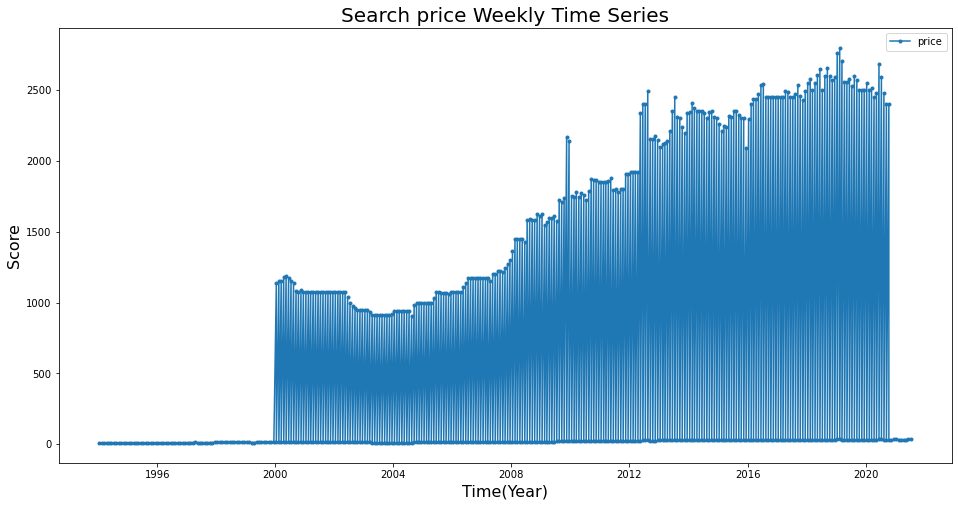

In [152]:
plt.figure(figsize=(16,8))

plt.plot(df['price'], ".-", label = 'price')

plt.title('Search price Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')


In [201]:
mdf=df
mdf.query("market == 'Mumbai'",inplace=True)
mdf.query("commodity == 'Rice'",inplace=True)
mdf = mdf[(mdf['datetime'].dt.strftime('%Y') >= '2013') & (mdf['datetime'].dt.strftime('%Y-%m') <= '2020-05')]

mdf.index = mdf.datetime
#mdf.drop([])

In [202]:
mdf.head()


,price,market,datetime,year,month,day,commodity
datetime,,,,,,,
2013-01-15,2100.00,Mumbai,2013-01-15,2013,1,15,Rice
2013-01-15,26.00,Mumbai,2013-01-15,2013,1,15,Rice
2013-02-15,2121.05,Mumbai,2013-02-15,2013,2,15,Rice
2013-02-15,26.00,Mumbai,2013-02-15,2013,2,15,Rice
2013-03-15,2125.00,Mumbai,2013-03-15,2013,3,15,Rice


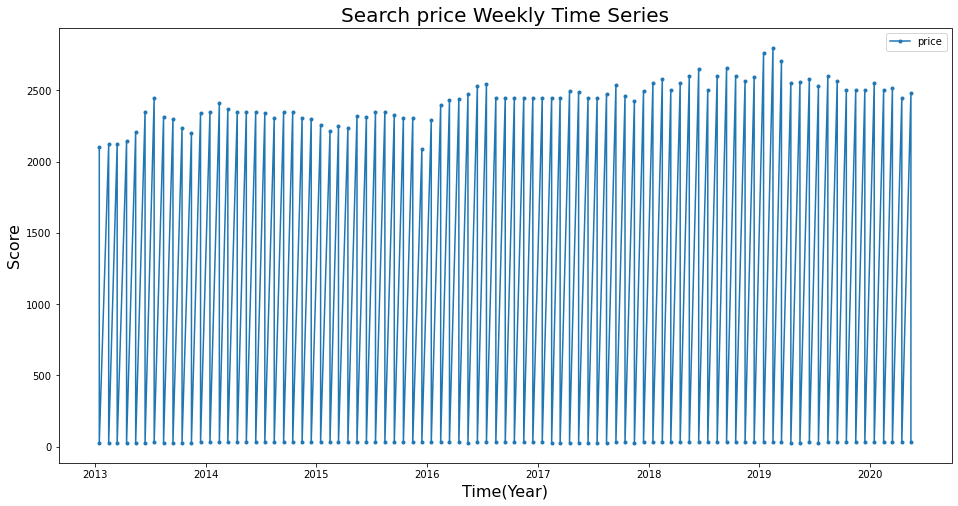

In [203]:
plt.figure(figsize=(16,8))

plt.plot(mdf['price'], ".-", label = 'price')

plt.title('Search price Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

In [204]:
#mdf.drop(['DD','MM','YYYY'],axis=1,inplace=True)
mdf

,price,market,datetime,year,month,day,commodity
datetime,,,,,,,
2013-01-15,2100.00,Mumbai,2013-01-15,2013,1,15,Rice
2013-01-15,26.00,Mumbai,2013-01-15,2013,1,15,Rice
2013-02-15,2121.05,Mumbai,2013-02-15,2013,2,15,Rice
2013-02-15,26.00,Mumbai,2013-02-15,2013,2,15,Rice
2013-03-15,2125.00,Mumbai,2013-03-15,2013,3,15,Rice
...,...,...,...,...,...,...,...
2020-03-15,31.14,Mumbai,2020-03-15,2020,3,15,Rice
2020-04-15,2450.00,Mumbai,2020-04-15,2020,4,15,Rice
2020-04-15,31.03,Mumbai,2020-04-15,2020,4,15,Rice


In [205]:
monthly = mdf.resample('M').sum()
monthly

,price,year,month,day
datetime,,,,
2013-01-31,2126.00,4026,2,30
2013-02-28,2147.05,4026,4,30
2013-03-31,2151.00,4026,6,30
2013-04-30,2170.16,4026,8,30
2013-05-31,2236.54,4026,10,30
...,...,...,...,...
2020-01-31,2583.58,4040,2,30
2020-02-29,2531.00,4040,4,30
2020-03-31,2548.79,4040,6,30


SETTING LIMITS

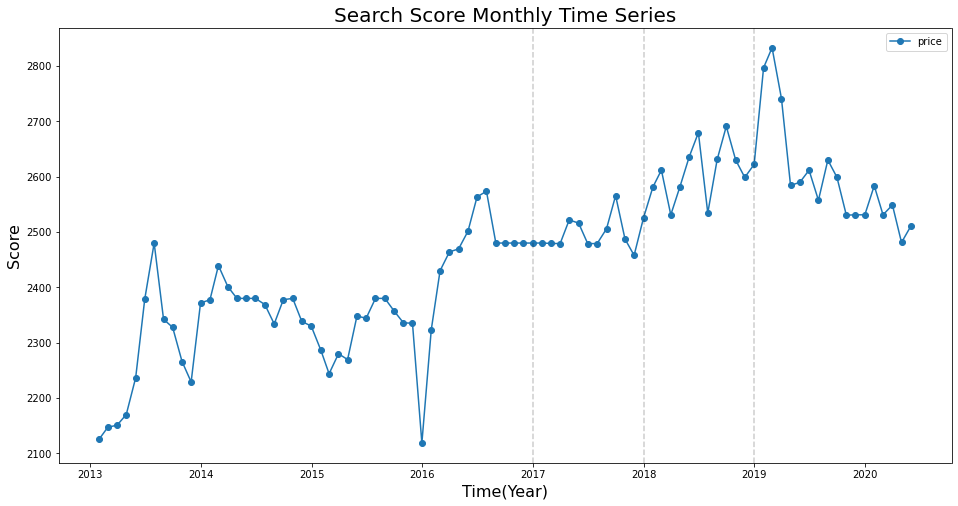

In [511]:
from datetime import datetime
start_date = datetime(2017,4,30)
end_date = datetime(2019,12,31)
plt.figure(figsize=(16,8))

plt.plot(monthly['price'], "o-", label = 'price')

plt.title('Search Score Monthly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [512]:
# DF Test using statsmodels
from statsmodels.tsa.stattools import adfuller

def df_test(time_series):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print (dfoutput)

In [513]:
lim_data = monthly[start_date:end_date]
len(lim_data)
df_test(lim_data.price)

Results of Dickey-Fuller Test:
Test Statistic                 -2.405890
p-value                         0.140081
#Lags Used                      0.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


In [514]:
len(lim_data)

33

In [515]:
print(list(lim_data.price))
first_diff = lim_data.price.diff()[1:]
print(list(first_diff))

[2521.86, 2515.96, 2479.0, 2479.0, 2505.71, 2565.71, 2487.24, 2457.7900000000004, 2525.45, 2581.23, 2611.79, 2531.0, 2581.47, 2636.17, 2679.43, 2534.2000000000003, 2631.0, 2690.87, 2630.0, 2598.65, 2622.17, 2796.68, 2833.0, 2741.15, 2584.0, 2589.94, 2611.65, 2557.29, 2630.0, 2598.87, 2530.39, 2531.0, 2531.0]
[-5.900000000000091, -36.960000000000036, 0.0, 26.710000000000036, 60.0, -78.47000000000025, -29.449999999999363, 67.6599999999994, 55.7800000000002, 30.559999999999945, -80.78999999999996, 50.4699999999998, 54.70000000000027, 43.25999999999976, -145.22999999999956, 96.79999999999973, 59.86999999999989, -60.86999999999989, -31.34999999999991, 23.519999999999982, 174.50999999999976, 36.320000000000164, -91.84999999999991, -157.1500000000001, 5.940000000000055, 21.710000000000036, -54.36000000000013, 72.71000000000004, -31.13000000000011, -68.48000000000002, 0.6100000000001273, 0.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


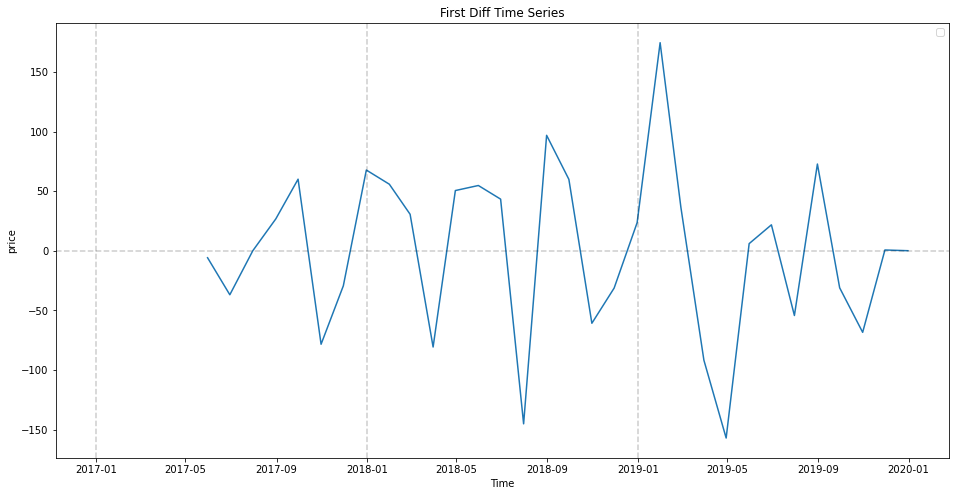

In [516]:
plt.figure(figsize=(16,8))
plt.plot(first_diff)
plt.title('First Diff Time Series')
plt.xlabel("Time")
plt.ylabel("price")
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [517]:
df_test(first_diff)

Results of Dickey-Fuller Test:
Test Statistic                -5.996085e+00
p-value                        1.700326e-07
#Lags Used                     1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64


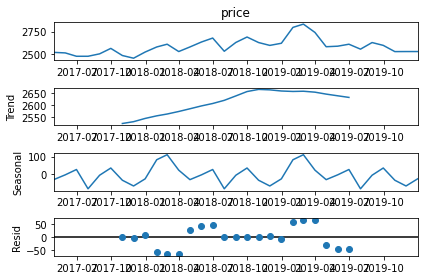

In [518]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(lim_data.price).plot()
plt.show()

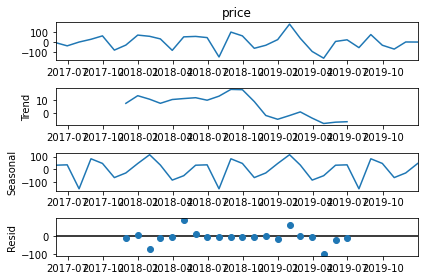

In [519]:
sm.tsa.seasonal_decompose(first_diff).plot()
plt.show()

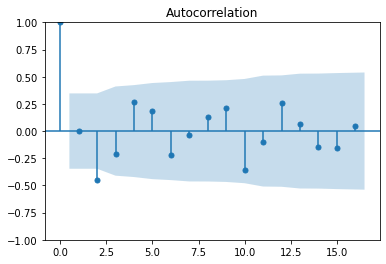

In [520]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(first_diff)

/Users/suyog_k/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


ValueError: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 16 must be < 16.

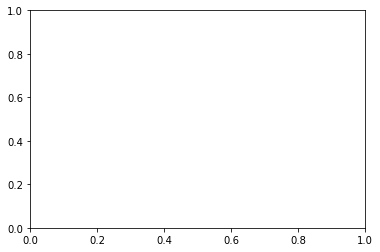

In [521]:
pacf_plot = plot_pacf(first_diff) #error 


In [522]:

lim_data

,price,year,month,day
datetime,,,,
2017-04-30,2521.86,4034,8,30
2017-05-31,2515.96,4034,10,30
2017-06-30,2479.00,4034,12,30
2017-07-31,2479.00,4034,14,30
2017-08-31,2505.71,4034,16,30
2017-09-30,2565.71,4034,18,30
2017-10-31,2487.24,4034,20,30
2017-11-30,2457.79,4034,22,30
2017-12-31,2525.45,4034,24,30


datetime for ML model

In [523]:
from datetime import timedelta

train_end = datetime(2019,5,15)
test_end = datetime(2020,1,15)

train_data = lim_data[:train_end]
test_data = lim_data[train_end + timedelta(days=1):test_end]

train_data.tail(5)

,price,year,month,day
datetime,,,,
2019-01-31,2796.68,4038,2,30
2019-02-28,2833.00,4038,4,30
2019-03-31,2741.15,4038,6,30
2019-04-30,2584.00,4038,8,30
2019-05-31,2589.94,4038,10,30


In [524]:
train_data.head()

,price,year,month,day
datetime,,,,
2017-04-30,2521.86,4034,8,30
2017-05-31,2515.96,4034,10,30
2017-06-30,2479.00,4034,12,30
2017-07-31,2479.00,4034,14,30
2017-08-31,2505.71,4034,16,30


In [525]:

test_data

,price,year,month,day
datetime,,,,
2019-06-30,2611.65,4038,12,30
2019-07-31,2557.29,4038,14,30
2019-08-31,2630.00,4038,16,30
2019-09-30,2598.87,4038,18,30
2019-10-31,2530.39,4038,20,30
2019-11-30,2531.00,4038,22,30
2019-12-31,2531.00,4038,24,30


In [526]:
train_data.tail()

,price,year,month,day
datetime,,,,
2019-01-31,2796.68,4038,2,30
2019-02-28,2833.00,4038,4,30
2019-03-31,2741.15,4038,6,30
2019-04-30,2584.00,4038,8,30
2019-05-31,2589.94,4038,10,30


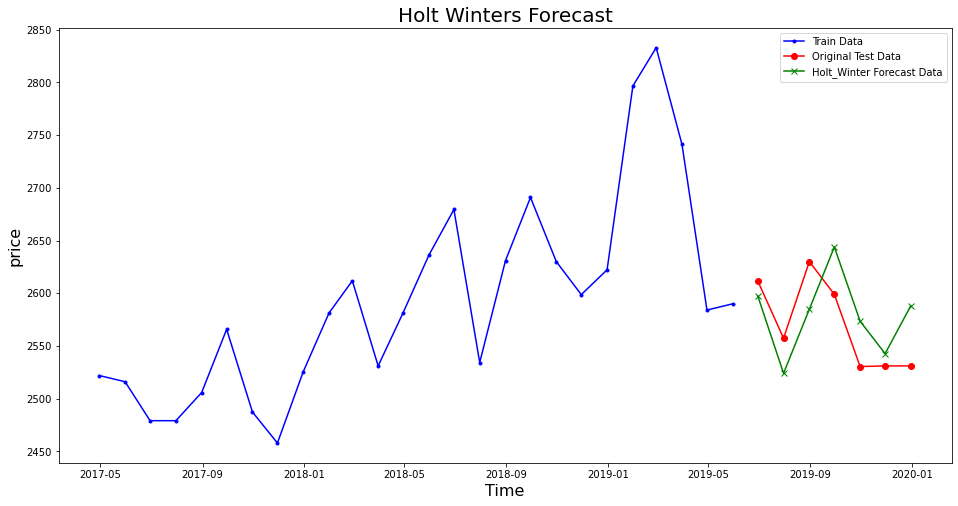

In [527]:
from statsmodels.tsa.api import ExponentialSmoothing


holt_winter = ExponentialSmoothing(np.asarray(train_data['price']), seasonal_periods=12, trend='add', seasonal='add')

hw_fit = holt_winter.fit()

hw_forecast = hw_fit.forecast(len(test_data))

plt.figure(figsize=(16,8))

plt.plot(train_data.index, train_data['price'], "b.-", label='Train Data')
plt.plot(test_data.index, test_data['price'], "ro-", label='Original Test Data')
plt.plot(test_data.index, hw_forecast, "gx-", label='Holt_Winter Forecast Data')
plt.ylabel('price', fontsize=16)
plt.xlabel('Time', fontsize=16)
plt.legend(loc='best')
plt.title('Holt Winters Forecast', fontsize=20)
plt.show()

In [528]:
print(hw_forecast)

[2597.42509472 2523.94207873 2584.82202239 2643.87518191 2573.3712191
 2542.64580674 2588.24584991]


In [529]:
print(test_data['price'])

datetime
2019-06-30    2611.65
2019-07-31    2557.29
2019-08-31    2630.00
2019-09-30    2598.87
2019-10-31    2530.39
2019-11-30    2531.00
2019-12-31    2531.00
Freq: M, Name: price, dtype: float64


In [530]:
hw_residuals = test_data['price'] - hw_forecast
print('Mean Absolute Percent Error:', round(np.mean(abs(hw_residuals/test_data.price)),2))
print('Root Mean Squared Error:', np.sqrt(np.mean(hw_residuals**2)))

Mean Absolute Percent Error: 0.01
Root Mean Squared Error: 38.98909222007062


In [531]:
#start of SARIMA algorithm build
from pmdarima import auto_arima

Sarimax_model = auto_arima(train_data.price,
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,                     #set seasonal difference
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Sarimax_model.summary()


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=154.968, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=158.777, Time=0.04 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=158.679, Time=0.05 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=156.921, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=156.916, Time=0.02 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=156.829, Time=0.02 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=156.784, Time=0.02 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.04 sec
 ARIMA(0,1,0)(0,1,0)[12] intercept   : AIC=156.853, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,1,0)[12]          
Total fit time: 0.360 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   26
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -76.484
Date:                            Sat, 25 Feb 2023   AIC                            154.968
Time:                                    21:31:17   BIC                            155.533
Sample:                                         0   HQIC                           154.852
                                             - 26                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7545.5429   2647.516      2.850      0.004    2356.507    1.27e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.55
Prob(Q):                              0.67   Prob(JB):                         0.46
Heteroskedasticity (H):               1.26   Skew:                            -0.84
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [552]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

my_order = (0,1,0)

my_seasonal_order = (0, 1, 0, 12)

# define model
model = SARIMAX(train_data.price, order=my_order, seasonal_order=my_seasonal_order)
#fitting the model
model_fit = model.fit()
print(model_fit.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01841D+00    |proj g|=  8.13956D-03

At iterate    5    f=  2.94169D+00    |proj g|=  2.59451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      6      8      1     0     0   1.029D-06   2.942D+00
  F =   2.9416920868408902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                           

 This problem is unconstrained.


In [553]:
#forecast
predictions = model_fit.forecast(len(test_data.price))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data.price - predictions

In [554]:
residuals


datetime
2019-06-30   -21.55
2019-07-31    69.32
2019-08-31    45.23
2019-09-30   -45.77
2019-10-31   -53.38
2019-11-30   -21.42
2019-12-31   -44.94
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

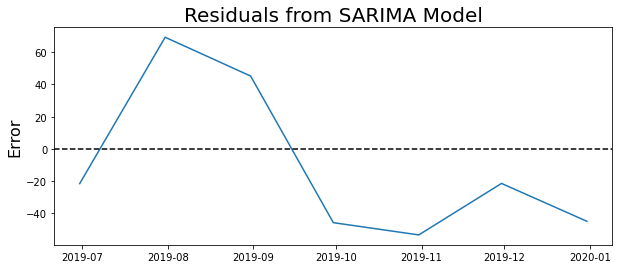

In [555]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [556]:
residuals.mean() #problem here and before #reduce prediction range 

-10.358571428570615

In [557]:
predictions

datetime
2019-06-30    2633.20
2019-07-31    2487.97
2019-08-31    2584.77
2019-09-30    2644.64
2019-10-31    2583.77
2019-11-30    2552.42
2019-12-31    2575.94
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 0, 'Time')

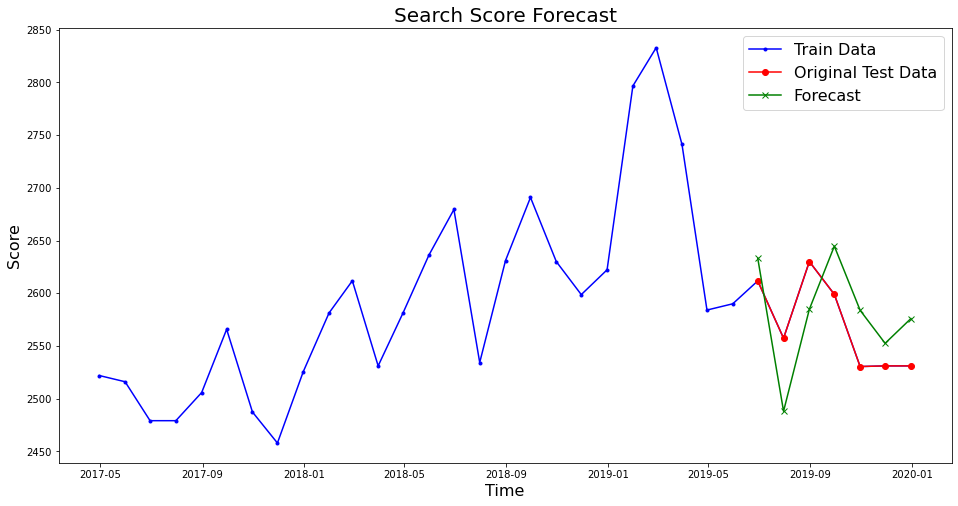

In [558]:
plt.figure(figsize=(16,8))

plt.plot(lim_data.price, "b.-")
plt.plot(test_data.price, "ro-")
plt.plot(predictions, "gx-")
plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=16)
plt.title('Search Score Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

In [559]:
print(test_data.index)
train_data.shape

DatetimeIndex(['2019-06-30', '2019-07-31', '2019-08-31', '2019-09-30',
               '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='datetime', freq='M')


(26, 4)

In [560]:
rolling_predictions = []

for train_end in test_data.index:
    #print(train_end-timedelta(days=1))
    train_data1 = lim_data.price[:train_end-timedelta(days=1)]
    #print(len(train_data1))
    model = SARIMAX(train_data1, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions.append(pred[0])
    
rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)
rolling_predictions


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.01841D+00    |proj g|=  8.13956D-03

At iterate    5    f=  2.94169D+00    |proj g|=  2.59451D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      6      8      1     0     0   1.029D-06   2.942D+00
  F =   2.9416920868408902     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


datetime
2019-06-30    2633.20
2019-07-31    2466.42
2019-08-31    2654.09
2019-09-30    2689.87
2019-10-31    2538.00
2019-11-30    2499.04
2019-12-31    2554.52
Freq: M, dtype: float64

In [561]:
rolling_residuals = test_data.price - rolling_predictions
rolling_residuals

datetime
2019-06-30   -21.55
2019-07-31    90.87
2019-08-31   -24.09
2019-09-30   -91.00
2019-10-31    -7.61
2019-11-30    31.96
2019-12-31   -23.52
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

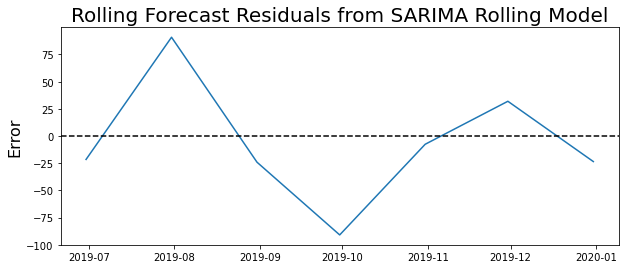

In [562]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Rolling Model', fontsize=20)
plt.ylabel('Error', fontsize=16)


In [563]:
rolling_residuals.mean()

-6.420000000000398

Text(0.5, 0, 'Time')

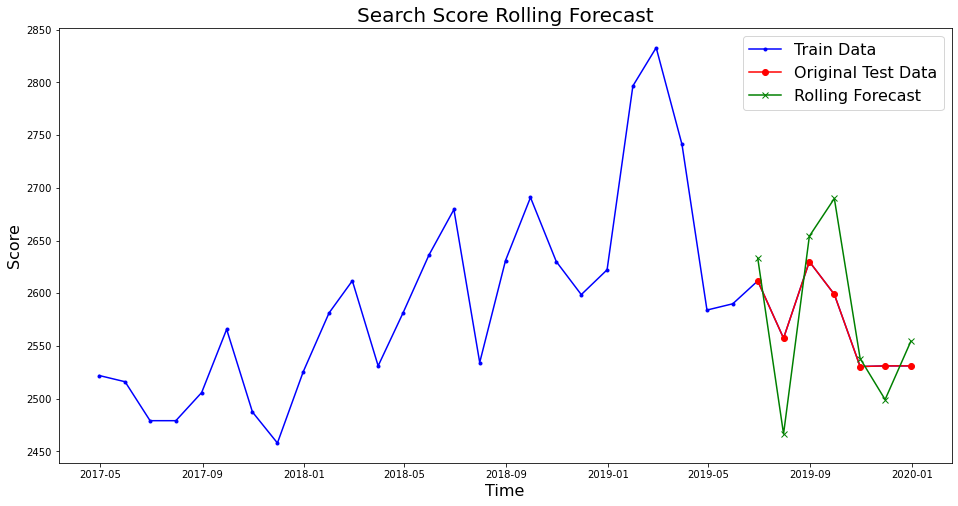

In [564]:
plt.figure(figsize=(16,8))

plt.plot(lim_data.price, "b.-")
plt.plot(test_data.price, "ro-")
plt.plot(rolling_predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Rolling Forecast'), fontsize=16)

plt.title('Search Score Rolling Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

In [565]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.price)),2))
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))


Mean Absolute Percent Error: 0.02
Root Mean Squared Error: 52.393608661471546


In [570]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train2 = mdf.price[start_date:train_end]
test2 = mdf.price[train_end:test_end]

from statsmodels.tsa.arima.model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(mdf.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  178
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1628.969
Date:                Sat, 25 Feb 2023   AIC                           3259.939
Time:                        23:51:17   BIC                           3263.115
Sample:                             0   HQIC                          3261.227
                                - 178                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       5.74e+06   7.28e+06      0.788      0.431   -8.53e+06       2e+07
Ljung-Box (L1) (Q):                 178.14   Jarque-Bera (JB):                29.09
Prob(Q):                              0.00   Pr

/Users/suyog_k/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/suyog_k/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/suyog_k/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


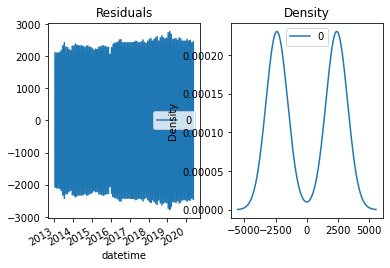

In [571]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [574]:
# Actual vs Fitted
from statsmodels.graphics.tsaplots import plot_predict
dta=
dta.index = pd.date_range(start='2017', end='2019', freq='A')
res = ARIMA(dta, order=(0,1,0)).fit()
fig, ax = plt.subplots()
ax = dta.loc['1950':].plot(ax=ax)
plot_predict(res, '1990', '2012', ax=ax)
plt.show()

NameError: name 'dta' is not defined